# <div align="center"> Explantory Data Analysis (EDA)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv',parse_dates=["registration_init_time","expiration_date"])
songs_extra_info = pd.read_csv('song_extra_info.csv')

## songs_extra_info

In [2]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan
    
songs_extra_info['song_year'] = songs_extra_info['isrc'].apply(isrc_to_year)

In [3]:
songs_extra_info = songs_extra_info[["song_id","song_year"]]
train = train.merge(songs_extra_info, on = 'song_id', how = 'left')
test = test.merge(songs_extra_info, on = 'song_id', how = 'left')

## train V.S. test

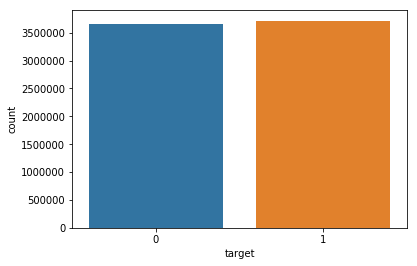

In [4]:
plt.figure()
sns.countplot(train['target'])

* So, $target$ in train set is balanced.

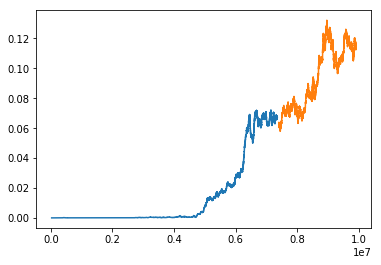

In [5]:
train['2017_song_year_percent'] = (train['song_year'] == 2017).rolling(window = 50000, center = True).mean()
test['2017_song_year_percent'] = (test['song_year'] == 2017).rolling(window = 50000, center = True).mean()

plt.figure()
plt.plot(train.index.values, train['2017_song_year_percent'], '-',
        train.shape[0] + test.index.values, test['2017_song_year_percent'], '-');

* Data is chronologically ordered - so we should choose last 25% of $train$ set as the validation set instead of random shuffling for modeling since it is a good representation of the $test$ set. 

Text(0.5, 0, 'source_system_tab')

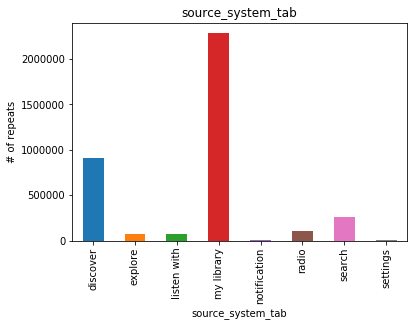

In [6]:
tab= train.groupby(['source_system_tab'])['target'].sum()
tab.plot(kind='bar')
plt.title('source_system_tab')
plt.ylabel('# of repeats')
plt.xlabel('source_system_tab')

Text(0.5, 0, 'source_screen_name')

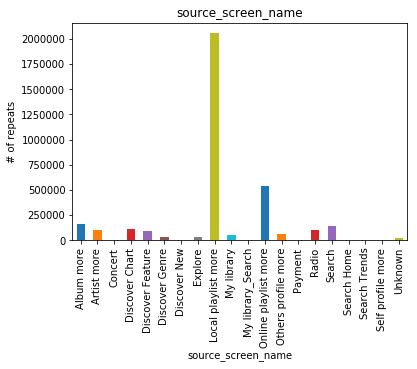

In [7]:
screen= train.groupby(['source_screen_name'])['target'].sum()
screen.plot(kind='bar')
plt.title('source_screen_name')
plt.ylabel('# of repeats')
plt.xlabel('source_screen_name')

Text(0.5, 0, 'source_type')

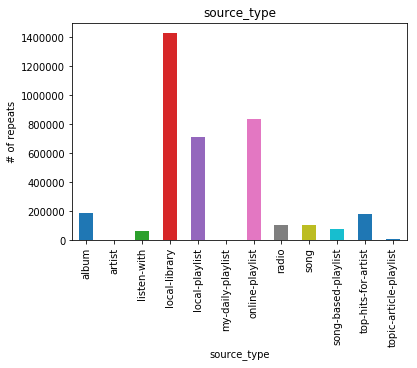

In [8]:
st= train.groupby(['source_type'])['target'].sum()
st.plot(kind='bar')
plt.title('source_type')
plt.ylabel('# of repeats')
plt.xlabel('source_type')

Text(0.5, 0, 'song_year')

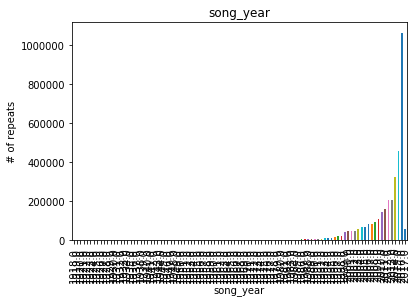

In [9]:
sy= train.groupby(['song_year'])['target'].sum()
sy.plot(kind='bar')
plt.title('song_year')
plt.ylabel('# of repeats')
plt.xlabel('song_year')

## members

In [10]:
members['membership_days'] = members['expiration_date'].subtract(members['registration_init_time']).dt.days
members['membership_days'].describe()

count    34403.000000
mean      1091.632474
std       1151.438441
min     -16191.000000
25%         72.000000
50%        701.000000
75%       1769.000000
max       5149.000000
Name: membership_days, dtype: float64

In [11]:
repeats=train[train.target==1]
member_repeats=repeats.groupby('msno',as_index=False).song_id.count()
member_repeats.columns=['msno','count']
members=members.merge(pd.DataFrame(member_repeats), on='msno', how='left')

In [12]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,membership_days,count
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20,2223,560.0
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22,725,NaN
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12,457,11.0
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07,1,NaN
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13,138,NaN


#### Gender

Text(0.5, 0, 'Gender')

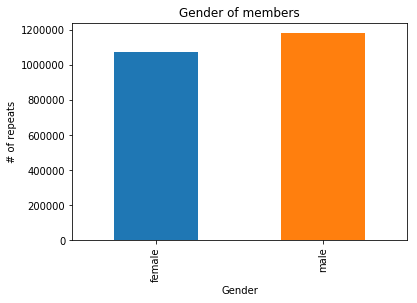

In [13]:
df=pd.DataFrame(members.sort_values(by='count',ascending=False))
gender=df.groupby(['gender'])['count'].sum()
gender.plot(kind='bar')
plt.title('Gender of members')
plt.ylabel('# of repeats')
plt.xlabel('Gender')

#### City

Text(0.5, 0, 'City')

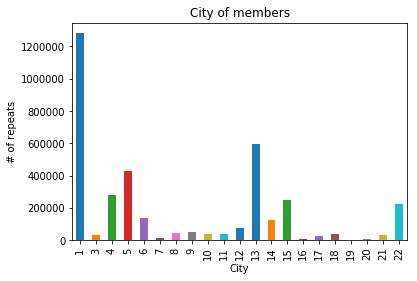

In [14]:
city=df.groupby(['city'])['count'].sum()
city.plot(kind='bar')
plt.title('City of members')
plt.ylabel('# of repeats')
plt.xlabel('City')

#### bd

Text(0.5, 0, 'Age')

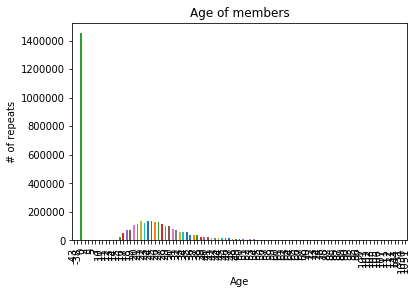

In [15]:
bd=df.groupby(['bd'])['count'].sum()
bd.plot(kind='bar')
plt.title('Age of members')
plt.ylabel('# of repeats')
plt.xlabel('Age')

#### membership days

Text(0.5, 0, 'Membership days')

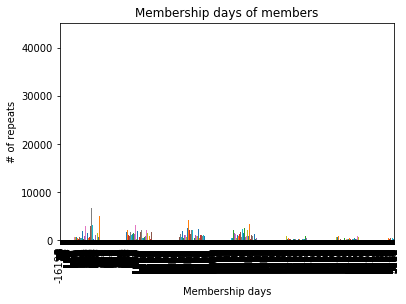

In [16]:
md=df.groupby(['membership_days'])['count'].sum()
md.plot(kind='bar')
plt.title('Membership days of members')
plt.ylabel('# of repeats')
plt.xlabel('Membership days')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 8 columns):
msno                      object
song_id                   object
source_system_tab         object
source_screen_name        object
source_type               object
target                    int64
song_year                 float64
2017_song_year_percent    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 506.6+ MB


## songs

In [18]:
repeats=train[train.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']
songs=songs.merge(pd.DataFrame(song_repeats), on='song_id', how='left')

In [19]:
#songs = songs.drop(['count'], axis=1)
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,count
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,5.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,1873.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,147.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,161.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,35.0


Text(0.5, 0, 'Language')

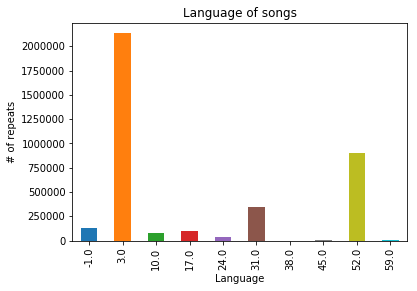

In [20]:
df=pd.DataFrame(songs.sort_values(by='count',ascending=False))
lang=df.groupby(['language'])['count'].sum()
lang.plot(kind='bar')
plt.title('Language of songs')
plt.ylabel('# of repeats')
plt.xlabel('Language')